In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [26]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [27]:
selected_classes = [3, 5]
def filter_classes(x, y):
    mask = np.isin(y, selected_classes)
    x, y = x[mask], y[mask]
    y = np.where(y == 3, 0, 1)  
    return x, y

In [28]:
x_train, y_train = filter_classes(x_train, y_train)
x_test, y_test = filter_classes(x_test, y_test)

x_train = x_train / 255.0
x_test = x_test / 255.0

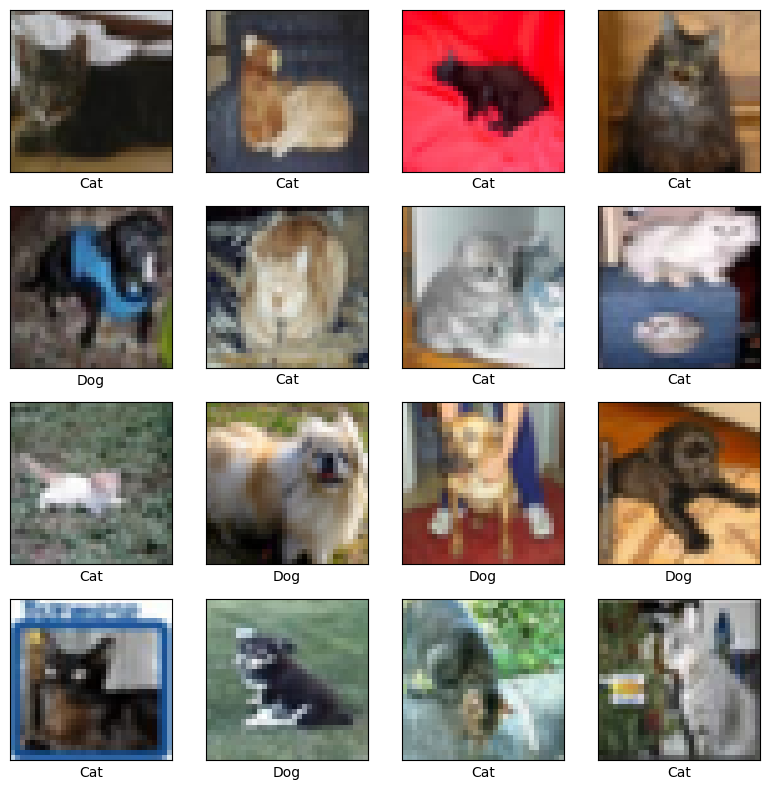

In [29]:
class_names = ['Cat', 'Dog']
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [30]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,161 (360.00 KB)

 Trainable params: 92,161 (360.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(x_train, y_train,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.5180 - loss: 0.6944 - val_accuracy: 0.6155 - val_loss: 0.6783
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.6100 - loss: 0.6602 - val_accuracy: 0.6715 - val_loss: 0.6046
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6832 - loss: 0.5870 - val_accuracy: 0.7350 - val_loss: 0.5301
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.7349 - loss: 0.5347 - val_accuracy: 0.7435 - val_loss: 0.5183
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7494 - loss: 0.5041 - val_accuracy: 0.7510 - val_loss: 0.5196
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.7723 - loss: 0.4744 - val_accuracy: 0.7735 - val_loss: 0.4739
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7994 - loss: 0.4335 - val_accuracy: 0.7790 - val_loss: 0.4590
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8029 - loss: 0.4186 - val_

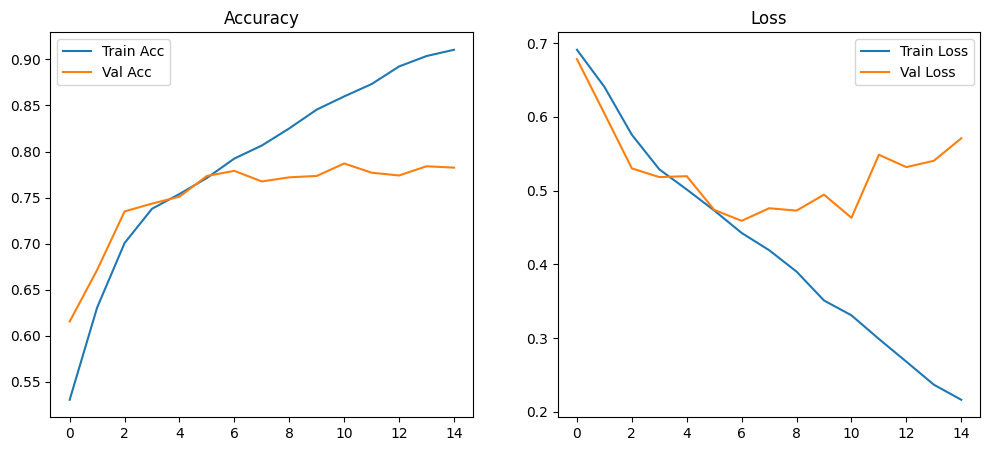

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(), plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(), plt.title('Loss')
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Final Test Accuracy: {test_acc * 100:.2f}%")

63/63 - 1s - 20ms/step - accuracy: 0.7825 - loss: 0.5709

✅ Final Test Accuracy: 78.25%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


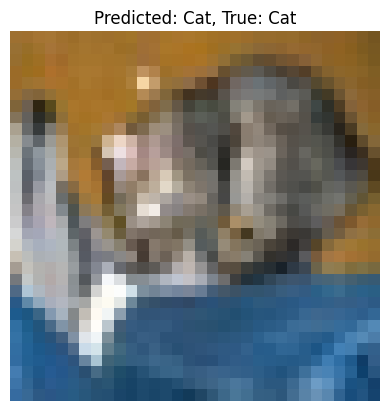

In [34]:
sample = x_test[0]
label = y_test[0]

prediction = model.predict(np.expand_dims(sample, axis=0))[0][0]
predicted_label = 'Dog' if prediction > 0.5 else 'Cat'
true_label = 'Dog' if label == 1 else 'Cat'

plt.imshow(sample)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step 


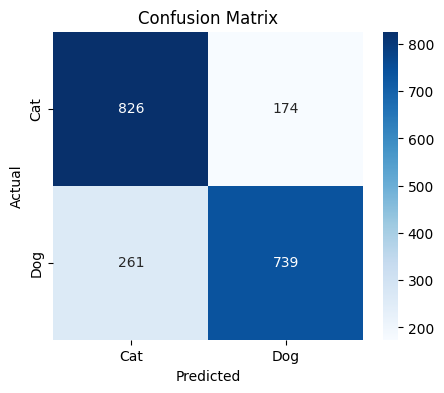

Classification Report:

              precision    recall  f1-score   support

         Cat       0.76      0.83      0.79      1000
         Dog       0.81      0.74      0.77      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



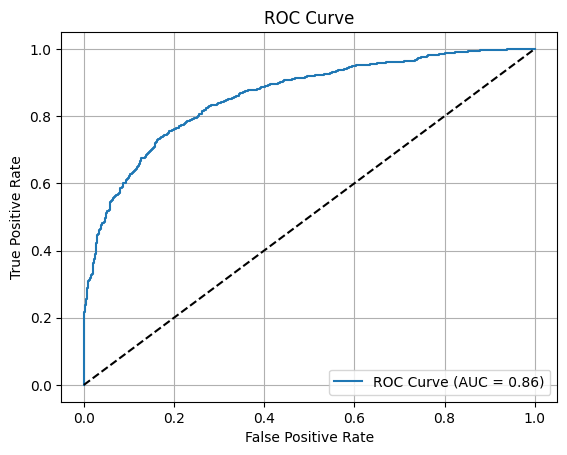

In [35]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cat', 'Dog'],
            yticklabels=['Cat', 'Dog'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()